<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
</p></center>

<h1><center><font size=10>Student-Shubin Zhai's Homework</center></font></h1>
<h1><center>Bank Churn Homework Week of March.17</center></h1>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [70]:
%pip install tensorflow
%pip install keras


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importing necessary libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

## Loading the dataset

In [72]:
df = pd.read_csv('bank.csv')

## Data Overview

# check if the values are in the ranges as expected with right speads #
All values seems to be in the correct ranges.  We also need to drop RowNumber, and CustomerId as they are not needed.

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## Check for the features data type ##
looks like we need to drop the Surname as well as a feature

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [77]:
df.duplicated().sum()

0

In [78]:
data = df.copy()
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

## Check for skewness of the data and normalize it if needed
We need to address the skewness of the data for age and # of credit cards
We also need to address # of customer with zero balance
We also need to address the target classes imbalance


                Skewness           Interpretation  \
CreditScore      -0.0716  Approximately symmetric   
Age               1.0113      Highly right-skewed   
Tenure             0.011  Approximately symmetric   
Balance          -0.1411  Approximately symmetric   
NumOfProducts     0.7456  Moderately right-skewed   
HasCrCard        -0.9018   Moderately left-skewed   
IsActiveMember   -0.0604  Approximately symmetric   
EstimatedSalary   0.0021  Approximately symmetric   
Exited            1.4716      Highly right-skewed   

                                       Transformation Suggestion  
CreditScore                             No transformation needed  
Age              Try log(x), log(x+1), or Box-Cox transformation  
Tenure                                  No transformation needed  
Balance                                 No transformation needed  
NumOfProducts               Try sqrt(x) or log(x) transformation  
HasCrCard                           Try square(x) transformation  


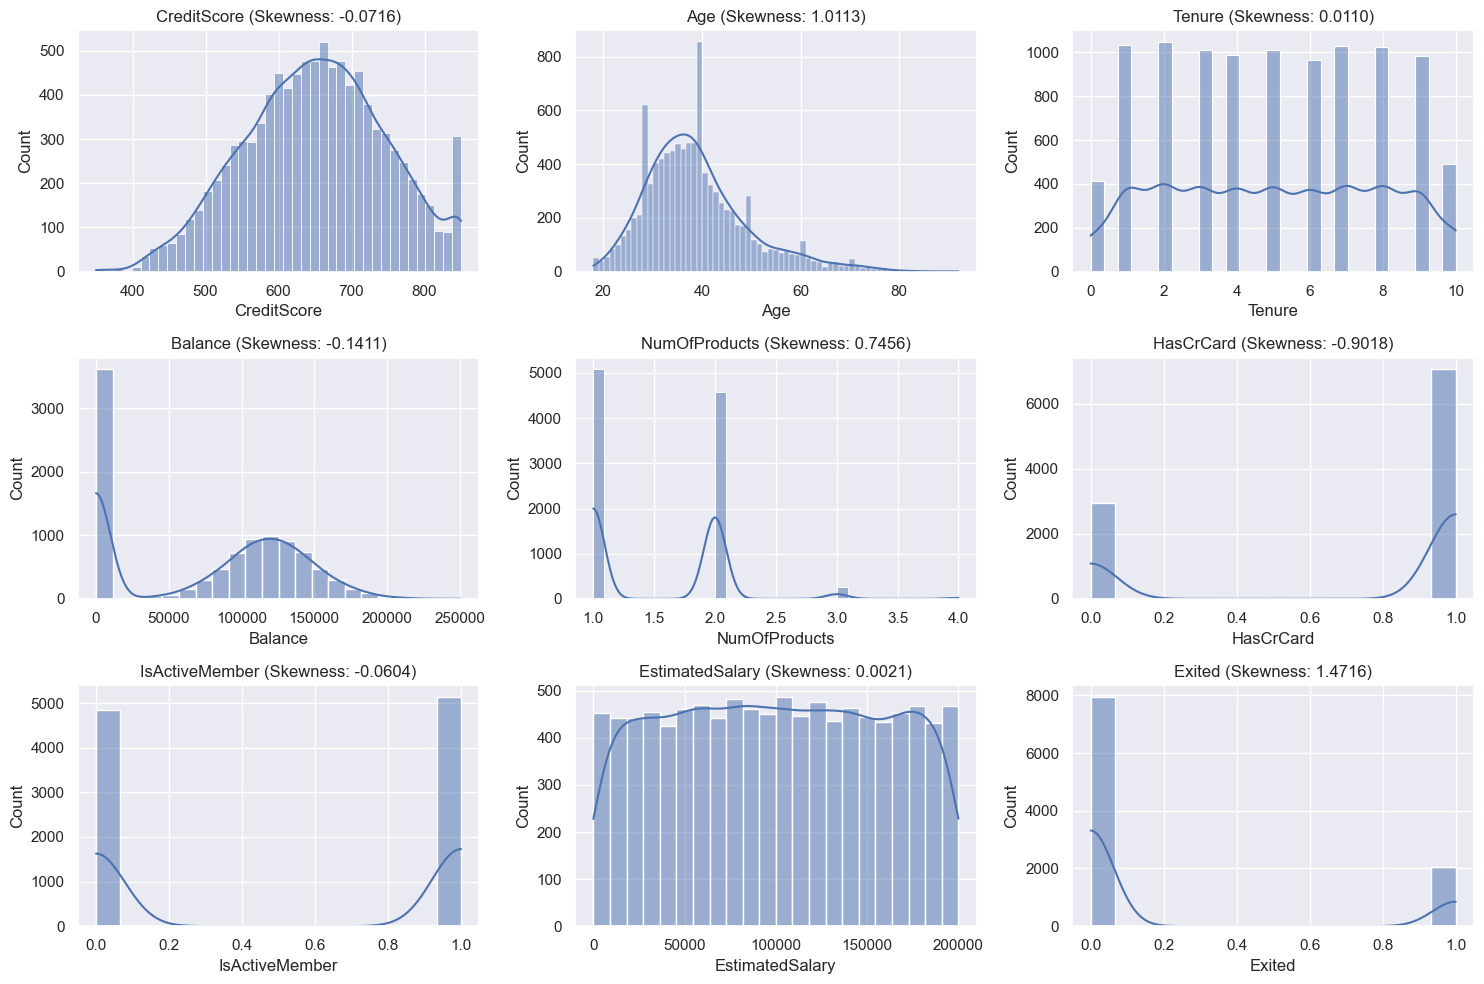

In [79]:


def check_feature_skewness(df):
    # Create a summary DataFrame for skewness
    skew_summary = pd.DataFrame(
        index=df.select_dtypes(include=[np.number]).columns,
        columns=['Skewness', 'Interpretation', 'Transformation Suggestion']
    )
    
    for column in skew_summary.index:
        # Calculate skewness
        skewness = df[column].skew()
        skew_summary.loc[column, 'Skewness'] = round(skewness, 4)
        
        # Interpret skewness
        if abs(skewness) < 0.5:
            interpretation = "Approximately symmetric"
            transform = "No transformation needed"
        elif abs(skewness) < 1:
            if skewness > 0:
                interpretation = "Moderately right-skewed"
                transform = "Try sqrt(x) or log(x) transformation"
            else:
                interpretation = "Moderately left-skewed"
                transform = "Try square(x) transformation"
        else:
            if skewness > 0:
                interpretation = "Highly right-skewed"
                transform = "Try log(x), log(x+1), or Box-Cox transformation"
            else:
                interpretation = "Highly left-skewed"
                transform = "Try square(x), cube(x), or exponential transformation"
        
        skew_summary.loc[column, 'Interpretation'] = interpretation
        skew_summary.loc[column, 'Transformation Suggestion'] = transform
    
    return skew_summary

# Optional: Visualize the skewness with histograms
def plot_skewness(df, columns=None, figsize=(15, 10)):
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            skewness = df[col].skew()
            axes[i].set_title(f'{col} (Skewness: {skewness:.4f})')
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    return fig

# Example usage
skew_summary = check_feature_skewness(data)
print(skew_summary)

# Optional: Create visualizations
fig = plot_skewness(data)
plt.show()

In [ ]:
#remove all count with 0 balance because we assume customer with zero balance churn has not business impact for this project.
data1 = data.copy()
data1.drop(data1[data1["Balance"]==0].index, axis=0, inplace=True)




In [198]:
data1[data1['Balance']==0].count()

CreditScore        3617
Geography          3617
Gender             3617
Age                3617
Tenure             3617
Balance            3617
NumOfProducts      3617
HasCrCard          3617
IsActiveMember     3617
EstimatedSalary    3617
Exited             3617
dtype: int64

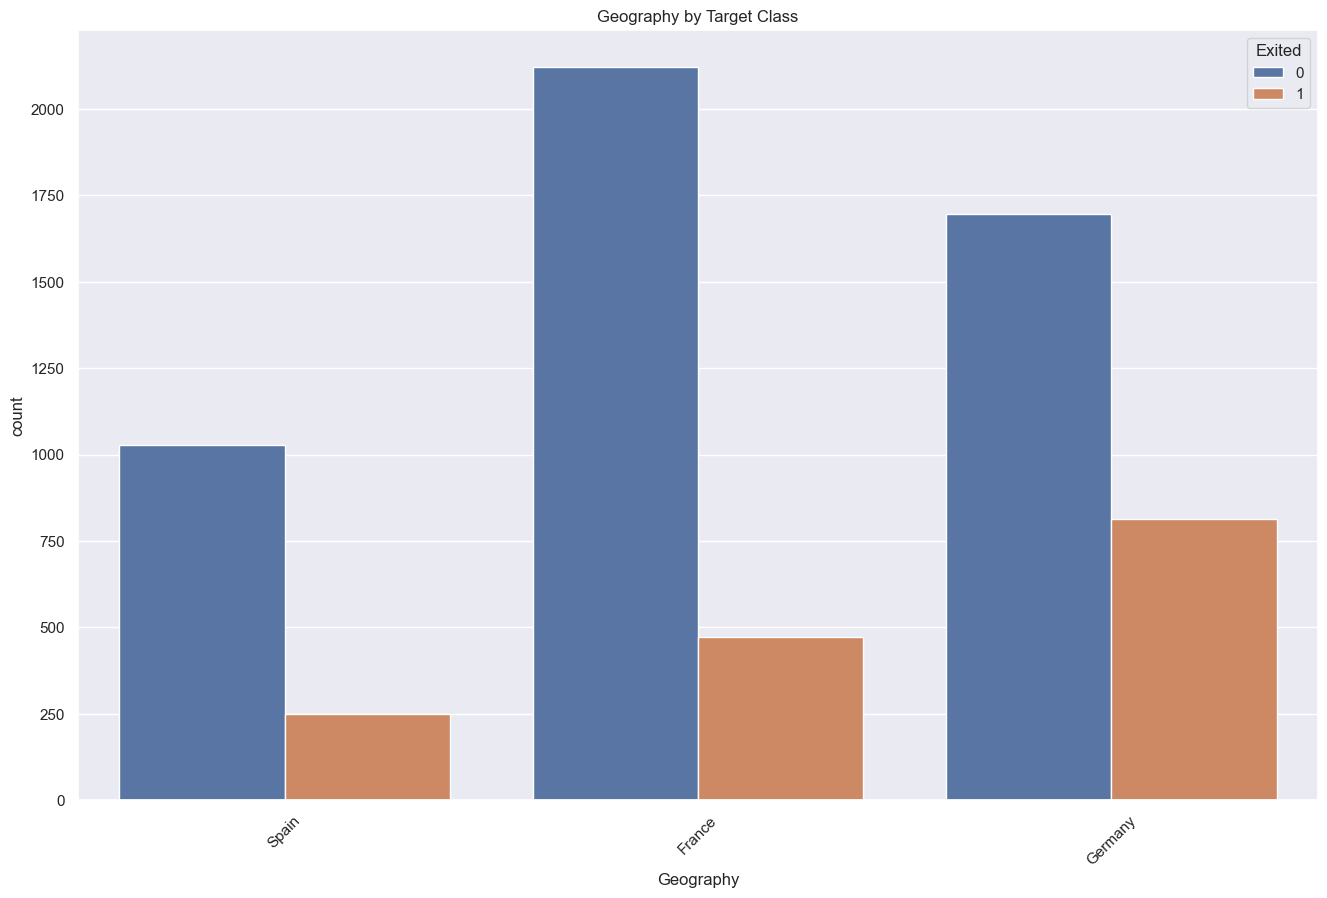

In [189]:


# Basic countplot
sns.countplot(x='Geography', hue='Exited', data=data1)
plt.title('Geography by Target Class')
plt.xticks(rotation=45)  # If category names are long
plt.show()

It looks like there are a lot more customer in France.  They also seems to churn less than  other locations.  Customer in Germany seems to churn the most.  

### Bivariate Analysis

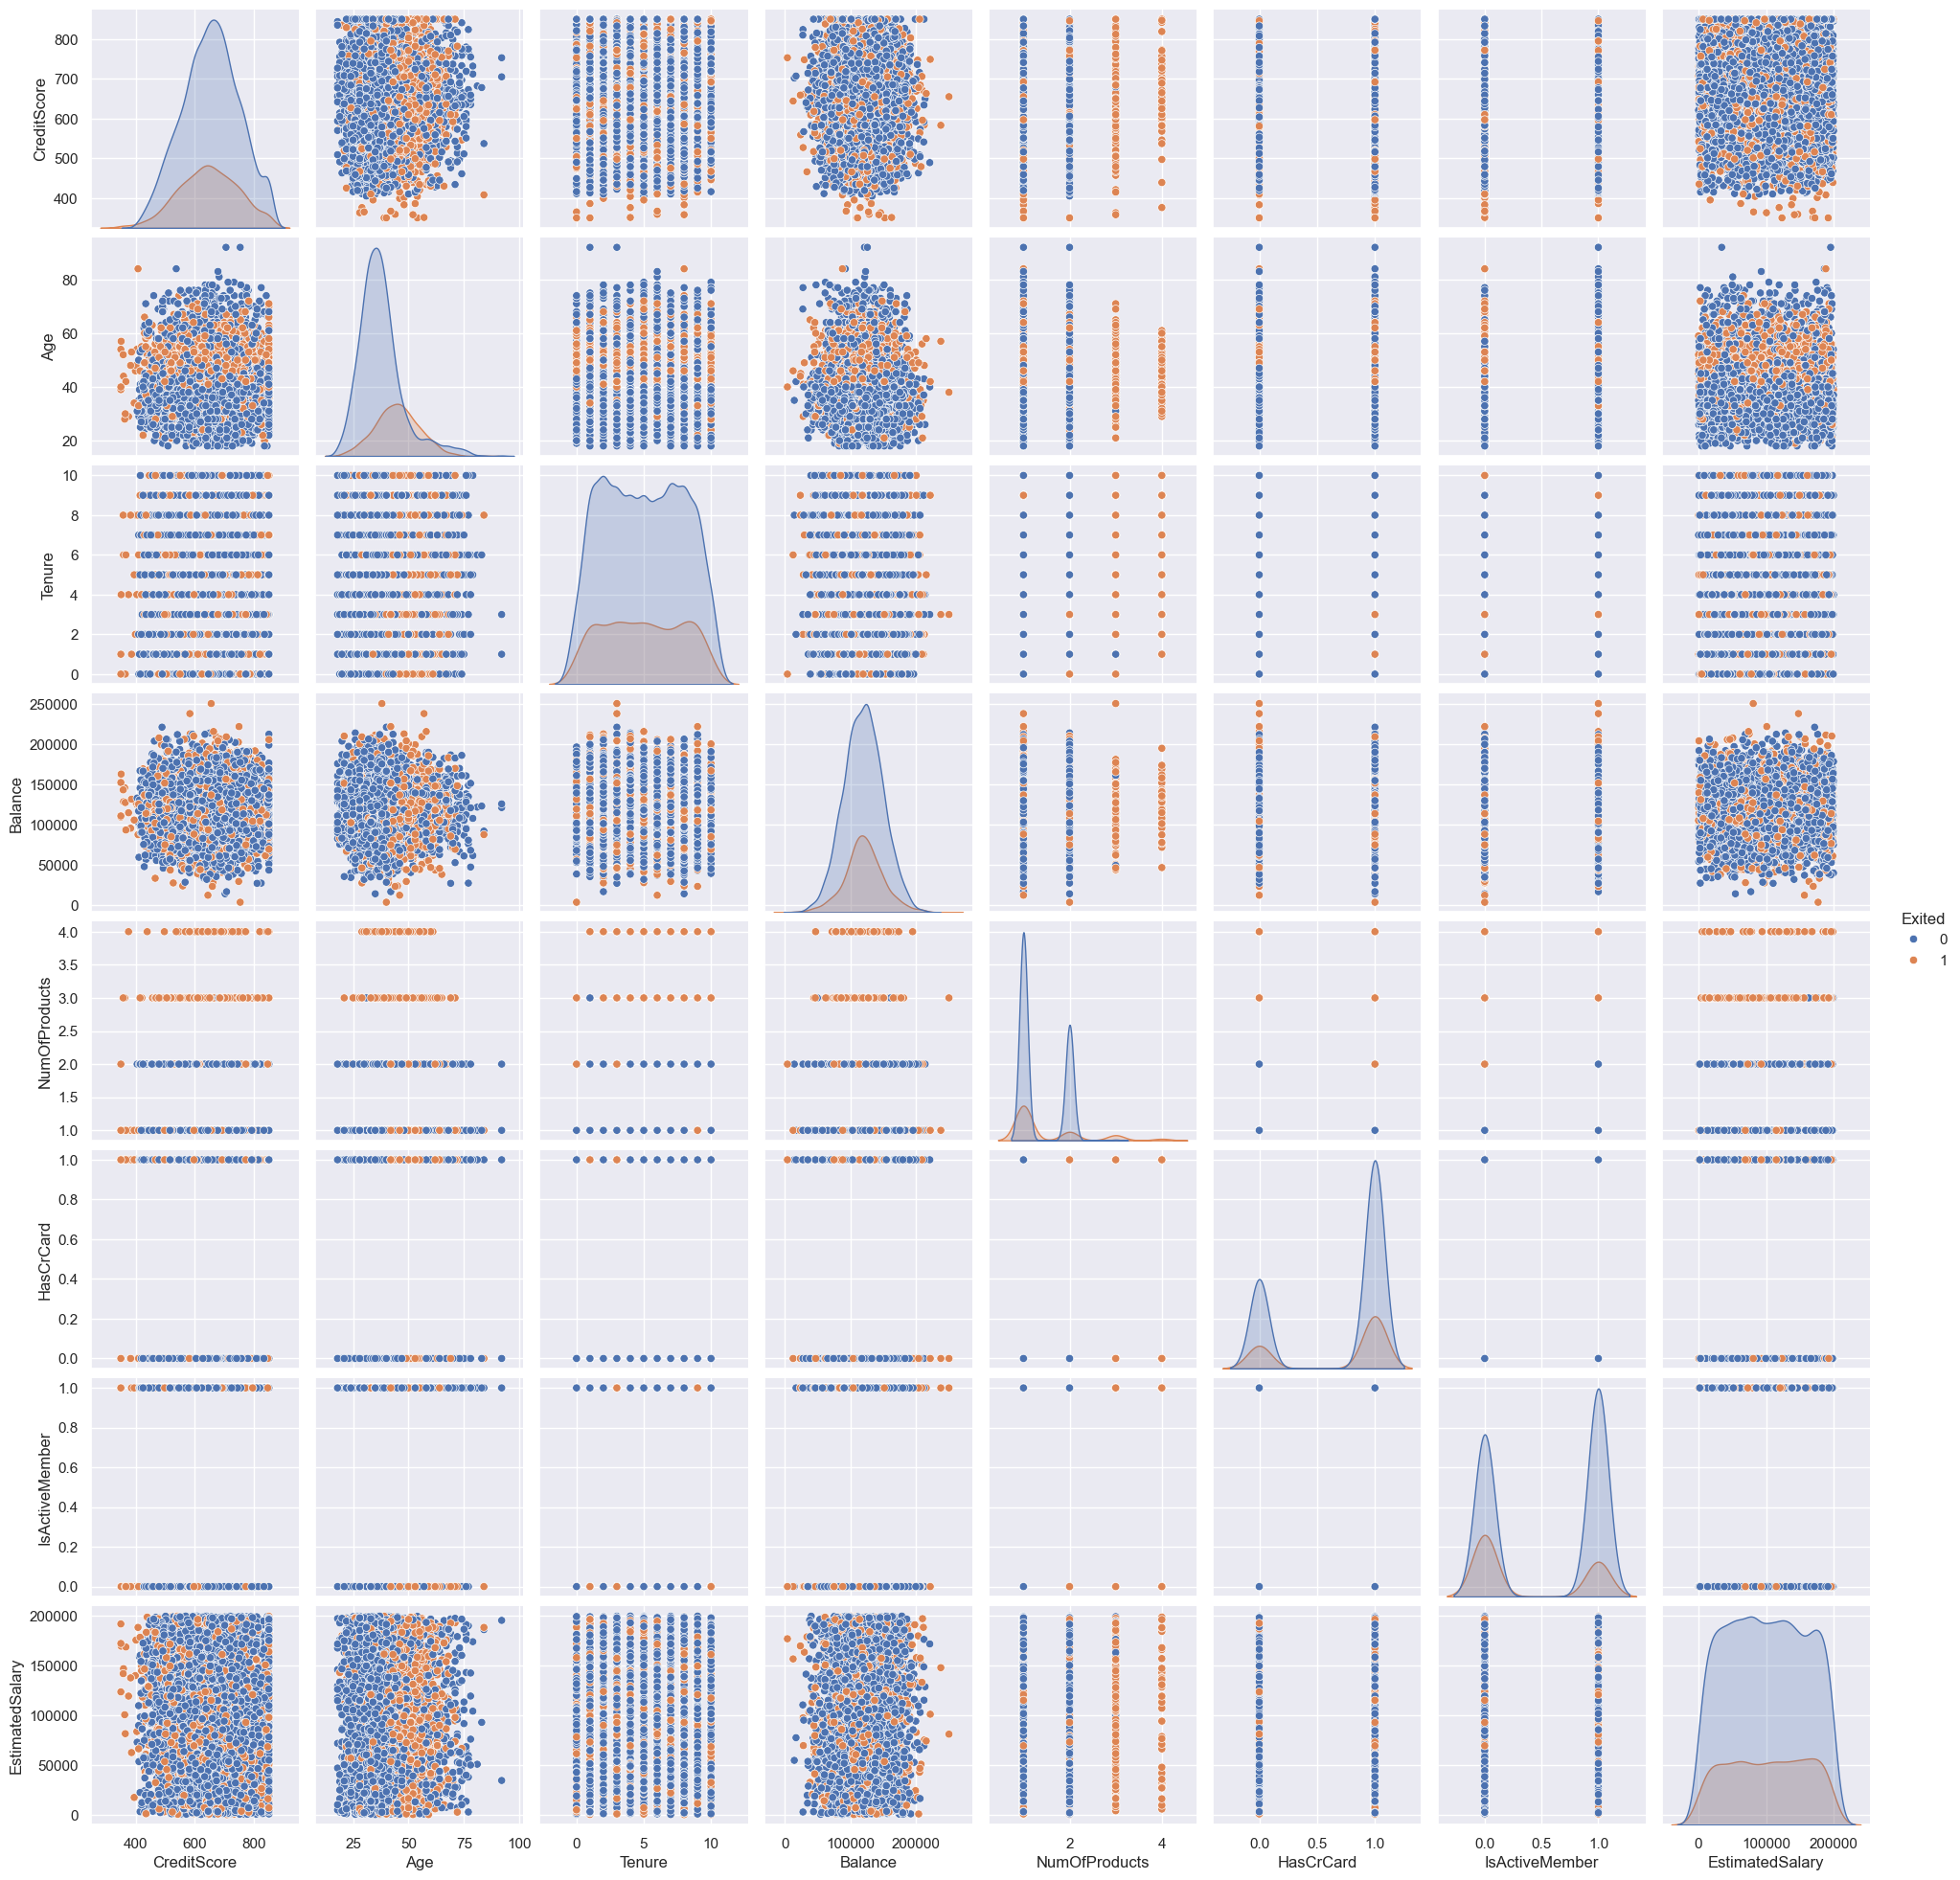

In [82]:
sns.pairplot(data1, hue="Exited")

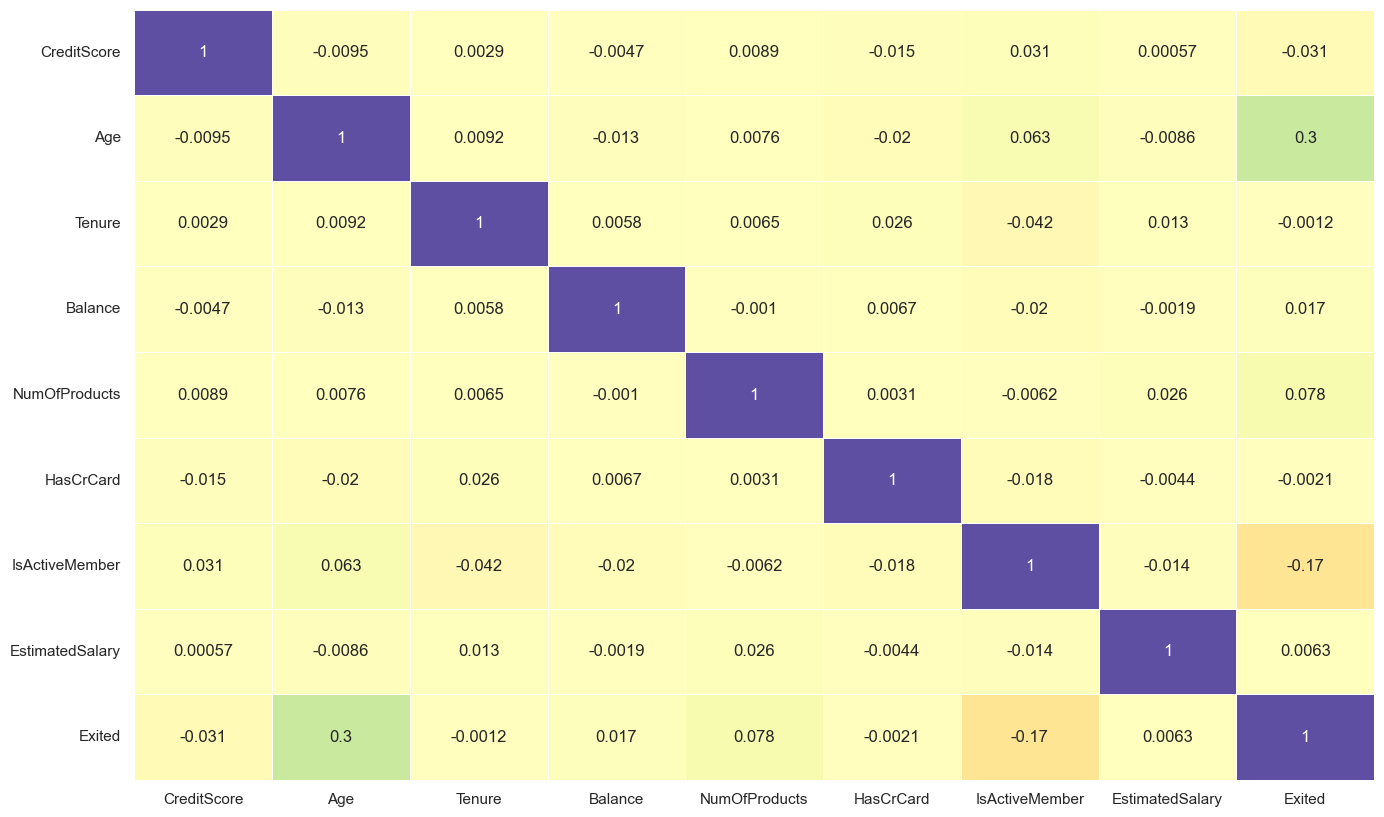

In [83]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data1.corr(numeric_only = True),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

From the analysis, it looks like:
<li>1.) No major issue with features multicollinearity
<li>2.) Age, NumberOfProducts, and IsActiveMember seem to have prediction power with target class,
<li>3.) Age and IsActiveNumber seem sto be correlated with person age at around 45;   

## Data Preprocessing

### Dummy Variable Creation

In [84]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


Following data prep will be done:
<li>hot encode the catagorical data for "Geography","Gender","HasCrCard","IsActiveMember"
<li>For age, we will standardScaler to transform it
<li>for discrete feature like NumOfProduct, we will do nothing.  In complex cases, we can choose min/max for standarization
<li>perform standardization on the continious values for example, use RobustScaller for credit score, balance, and estimated salary values because of potential outliers
<li>Since this is binary classification, there is no need to hot encode the target class value, just use sigmoid acitivation

In [85]:
#turn all cataegorical variables into dummies using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

oneHotEncoder = OneHotEncoder()

# Define which columns to one-hot encode
columns_to_hotencode = ["Geography","Gender","HasCrCard","IsActiveMember"]

columens_to_standardize = ["Age"]

columns_to_Robust = ["CreditScore", "Balance", "EstimatedSalary"]

categorical_onehottransformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

categorical_standardizetransformer = Pipeline(steps=[
    ('standarize', StandardScaler()), 
])

categorical_robusttransformer = Pipeline(steps=[
    ('robus', RobustScaler()), 
])


# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('catonehot', categorical_onehottransformer, columns_to_hotencode),
        ('standardize', categorical_standardizetransformer, columens_to_standardize),
        ('robust', categorical_robusttransformer, columns_to_Robust)    
    ],
    remainder='passthrough'  # Include other columns without transformation
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(data1)

# Create a new DataFrame with transformed data
transformed_df = pd.DataFrame(transformed_data, 
                            columns = pipeline.get_feature_names_out())

In [88]:
transformed_df.head()

,catonehot__Geography_0.0,catonehot__Geography_1.0,catonehot__Geography_2.0,catonehot__Gender_0.0,catonehot__Gender_1.0,catonehot__HasCrCard_0.0,catonehot__HasCrCard_1.0,catonehot__IsActiveMember_0.0,catonehot__IsActiveMember_1.0,standardize__Age,robust__CreditScore,robust__Balance,robust__EstimatedSalary,remainder__Tenure,remainder__NumOfProducts,remainder__Exited
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.172050,-0.328358,-0.916134,0.116527,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.267512,-1.119403,1.012479,0.130720,8.0,3.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.362973,1.477612,0.144192,-0.225376,2.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.458435,-0.052239,-0.154688,0.496807,8.0,2.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.973493,-2.059701,-0.121864,0.186058,4.0,4.0,1.0


### Train-validation-test Split

In [89]:
features_df = transformed_df.drop(['remainder__Exited'], axis=1)

target_df = transformed_df['remainder__Exited']

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)


### Data Normalization

In [90]:
#this is done in previous step, see above. 
transformed_df.head()

,catonehot__Geography_0.0,catonehot__Geography_1.0,catonehot__Geography_2.0,catonehot__Gender_0.0,catonehot__Gender_1.0,catonehot__HasCrCard_0.0,catonehot__HasCrCard_1.0,catonehot__IsActiveMember_0.0,catonehot__IsActiveMember_1.0,standardize__Age,robust__CreditScore,robust__Balance,robust__EstimatedSalary,remainder__Tenure,remainder__NumOfProducts,remainder__Exited
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.172050,-0.328358,-0.916134,0.116527,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.267512,-1.119403,1.012479,0.130720,8.0,3.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.362973,1.477612,0.144192,-0.225376,2.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.458435,-0.052239,-0.154688,0.496807,8.0,2.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-0.973493,-2.059701,-0.121864,0.186058,4.0,4.0,1.0


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-  The logic should be based on training data accuracy, validation accuracy and finally the test performance result.
<br/>
Here are the criteria for choosing the right model:
<li>The higher the validation accuracy is the better.  
<li>The validation accuracy should increase as epoch increases and be closely tracking with the training accuracy.
<li>The test model performance should be consistent with validation accuracy with reasonable loss value.



In [100]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

features_df.shape


(6383, 15)

### Neural Network with SGD Optimizer

In [ ]:
model_1 = Sequential()

model_1.add(Dense(128, activation='relu', input_shape=(15,)))

model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_1.summary()


/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history_1 = model_1.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=165, 
                    verbose=2)

Epoch 1/165
144/144 - 1s - 7ms/step - accuracy: 0.7532 - loss: 0.5722 - val_accuracy: 0.7730 - val_loss: 0.5269
Epoch 2/165
144/144 - 0s - 2ms/step - accuracy: 0.7567 - loss: 0.5310 - val_accuracy: 0.7789 - val_loss: 0.4906
Epoch 3/165
144/144 - 0s - 3ms/step - accuracy: 0.7617 - loss: 0.5065 - val_accuracy: 0.7828 - val_loss: 0.4674
Epoch 4/165
144/144 - 0s - 3ms/step - accuracy: 0.7715 - loss: 0.4925 - val_accuracy: 0.7886 - val_loss: 0.4543
Epoch 5/165
144/144 - 0s - 2ms/step - accuracy: 0.7765 - loss: 0.4850 - val_accuracy: 0.7965 - val_loss: 0.4468
Epoch 6/165
144/144 - 0s - 2ms/step - accuracy: 0.7804 - loss: 0.4808 - val_accuracy: 0.7984 - val_loss: 0.4420
Epoch 7/165
144/144 - 0s - 2ms/step - accuracy: 0.7832 - loss: 0.4780 - val_accuracy: 0.8004 - val_loss: 0.4385
Epoch 8/165
144/144 - 0s - 2ms/step - accuracy: 0.7854 - loss: 0.4759 - val_accuracy: 0.8004 - val_loss: 0.4359
Epoch 9/165
144/144 - 0s - 2ms/step - accuracy: 0.7854 - loss: 0.4742 - val_accuracy: 0.8063 - val_loss:

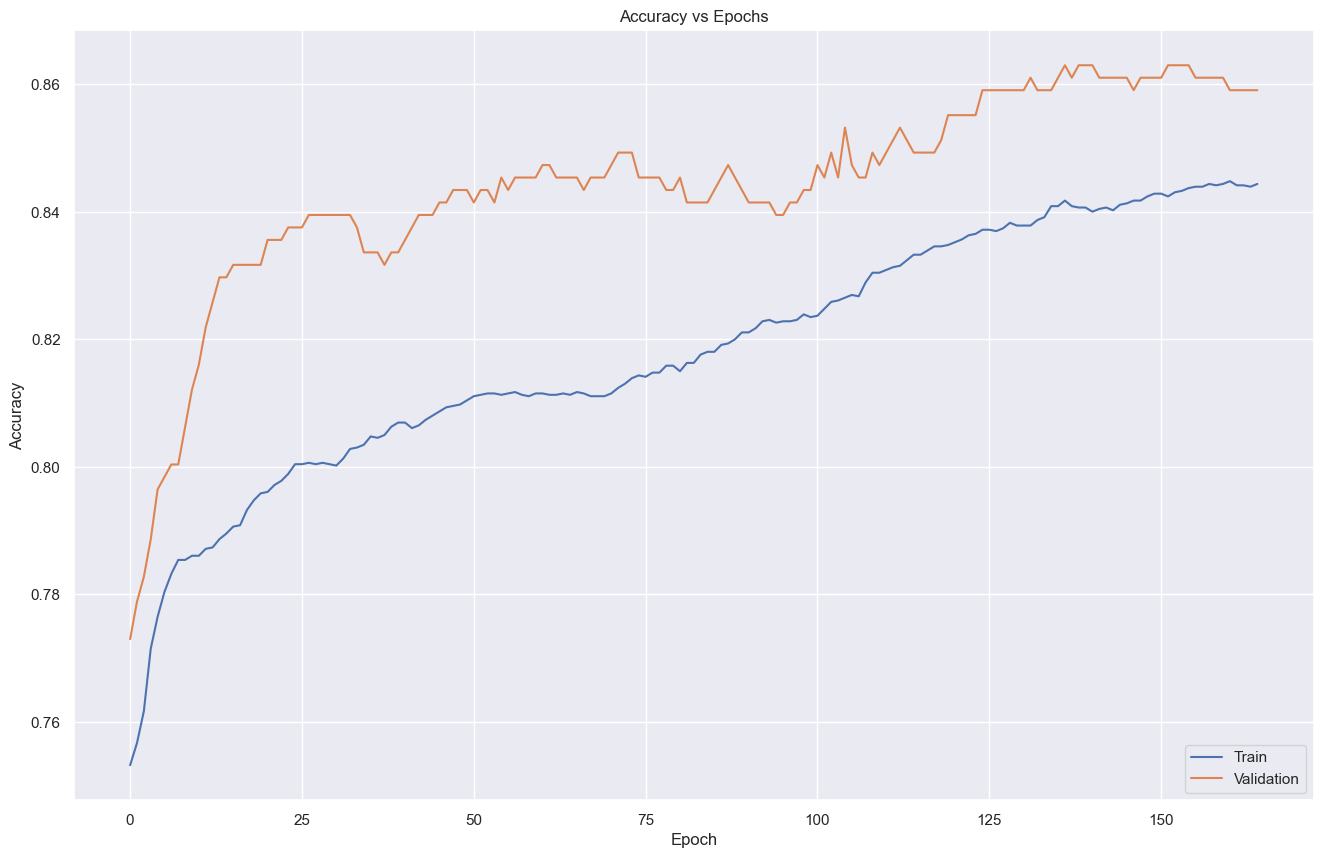

In [103]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

When validation accuracy is higher than training normally due to l1 and/or l2 and dropoff are turned off or there is imbalance in the data.  In this case since there is no l1/l2 and drop off, the reaon could be because of the data imbalance in the target class.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [116]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [117]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [118]:
model_2 = Sequential()

model_2.add(Dense(128, activation='relu', input_shape=(15,)))

model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()

/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history_2 = model_2.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=165, 
                    verbose=2)

Epoch 1/165
144/144 - 2s - 13ms/step - accuracy: 0.7708 - loss: 0.5026 - val_accuracy: 0.8102 - val_loss: 0.4333
Epoch 2/165
144/144 - 0s - 2ms/step - accuracy: 0.7946 - loss: 0.4627 - val_accuracy: 0.8297 - val_loss: 0.4150
Epoch 3/165
144/144 - 0s - 2ms/step - accuracy: 0.8022 - loss: 0.4488 - val_accuracy: 0.8395 - val_loss: 0.4057
Epoch 4/165
144/144 - 0s - 2ms/step - accuracy: 0.8072 - loss: 0.4377 - val_accuracy: 0.8376 - val_loss: 0.3983
Epoch 5/165
144/144 - 0s - 2ms/step - accuracy: 0.8133 - loss: 0.4264 - val_accuracy: 0.8415 - val_loss: 0.3931
Epoch 6/165
144/144 - 0s - 2ms/step - accuracy: 0.8172 - loss: 0.4159 - val_accuracy: 0.8434 - val_loss: 0.3873
Epoch 7/165
144/144 - 0s - 2ms/step - accuracy: 0.8246 - loss: 0.4048 - val_accuracy: 0.8474 - val_loss: 0.3812
Epoch 8/165
144/144 - 0s - 2ms/step - accuracy: 0.8296 - loss: 0.3943 - val_accuracy: 0.8513 - val_loss: 0.3755
Epoch 9/165
144/144 - 0s - 2ms/step - accuracy: 0.8372 - loss: 0.3845 - val_accuracy: 0.8513 - val_loss

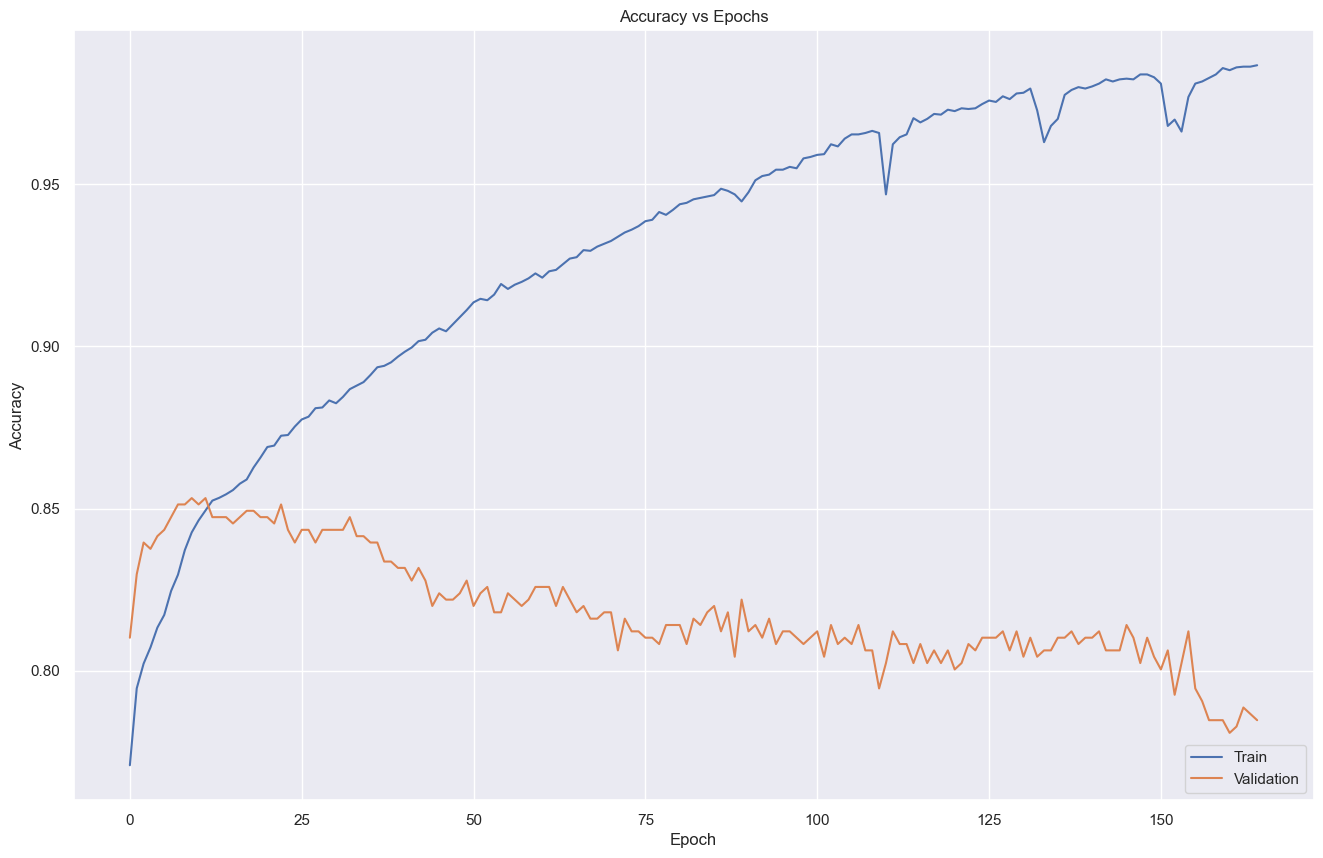

In [120]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

 This model is overfitting by remembering the training data by being to aggressive on gradient decent step.  This is aided by the fact there is imbalance in the target class.  This is also reflected by that fact that the model achieved decent validation accuracy with fewer epoch at 12.

### Neural Network with Adam Optimizer and Dropout

In [121]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [122]:
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [123]:
model_3 = Sequential()

model_3.add(Dense(128, activation='relu', input_shape=(15,)))
model_3.add(Dropout(0.1))

model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.1))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()

/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history_3 = model_3.fit(X_train, 
                    y_train,
                    validation_split=0.1, 
                    epochs=165, 
                    verbose=2)

Epoch 1/165
144/144 - 2s - 14ms/step - accuracy: 0.7706 - loss: 0.5039 - val_accuracy: 0.8102 - val_loss: 0.4363
Epoch 2/165
144/144 - 0s - 3ms/step - accuracy: 0.7843 - loss: 0.4683 - val_accuracy: 0.8297 - val_loss: 0.4149
Epoch 3/165
144/144 - 0s - 3ms/step - accuracy: 0.7959 - loss: 0.4578 - val_accuracy: 0.8356 - val_loss: 0.4079
Epoch 4/165
144/144 - 0s - 3ms/step - accuracy: 0.8030 - loss: 0.4457 - val_accuracy: 0.8337 - val_loss: 0.3981
Epoch 5/165
144/144 - 0s - 3ms/step - accuracy: 0.8089 - loss: 0.4373 - val_accuracy: 0.8415 - val_loss: 0.3908
Epoch 6/165
144/144 - 0s - 3ms/step - accuracy: 0.8139 - loss: 0.4264 - val_accuracy: 0.8434 - val_loss: 0.3815
Epoch 7/165
144/144 - 0s - 3ms/step - accuracy: 0.8183 - loss: 0.4198 - val_accuracy: 0.8356 - val_loss: 0.3815
Epoch 8/165
144/144 - 0s - 3ms/step - accuracy: 0.8252 - loss: 0.4097 - val_accuracy: 0.8434 - val_loss: 0.3699
Epoch 9/165
144/144 - 0s - 3ms/step - accuracy: 0.8296 - loss: 0.3981 - val_accuracy: 0.8493 - val_loss

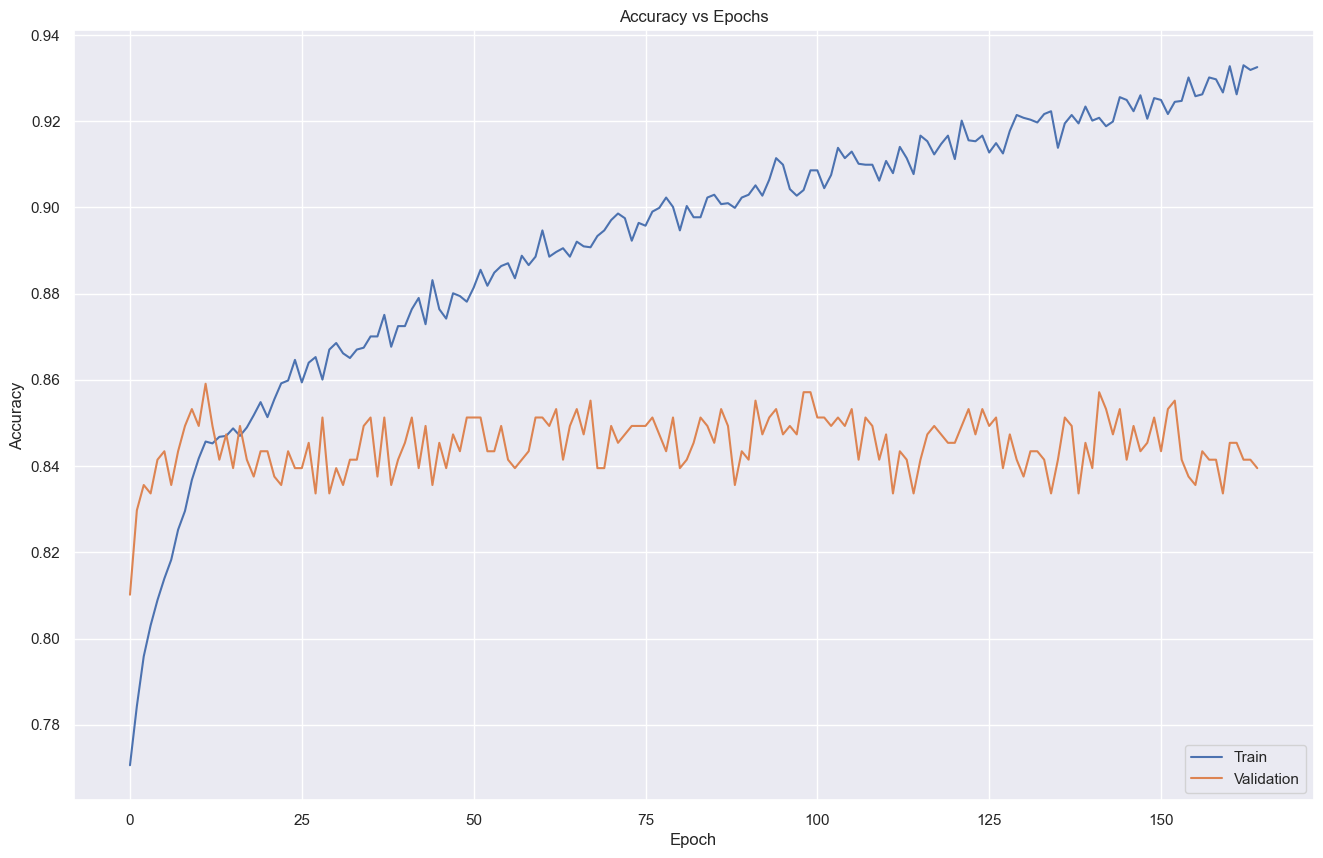

In [125]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

By adding drop out, it forces the model to turning the remaining weight more aggressively, so it performed better than without drop out.  However, because of optimizer is very aggressive in converging to the minimal and due to the target imbalance, the model remembers too much from the training data, and fails to generalize on the validation data.


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [126]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [127]:
sm = SMOTE(sampling_strategy=0.6, k_neighbors=5, random_state=1) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [149]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [150]:
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [151]:
model_4 = Sequential()

model_4.add(Dense(128, activation='relu', input_shape=(15,)))

model_4.add(Dense(128, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,689 (73.00 KB)

 Trainable params: 18,689 (73.00 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
history_4 = model_4.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.1, 
                    epochs=565, 
                    verbose=2)

Epoch 1/565
175/175 - 0s - 3ms/step - accuracy: 0.8520 - loss: 0.3435 - val_accuracy: 0.5871 - val_loss: 0.8174
Epoch 2/565
175/175 - 0s - 2ms/step - accuracy: 0.8527 - loss: 0.3432 - val_accuracy: 0.5968 - val_loss: 0.8092
Epoch 3/565
175/175 - 0s - 2ms/step - accuracy: 0.8521 - loss: 0.3429 - val_accuracy: 0.5935 - val_loss: 0.8175
Epoch 4/565
175/175 - 0s - 2ms/step - accuracy: 0.8530 - loss: 0.3427 - val_accuracy: 0.5952 - val_loss: 0.8152
Epoch 5/565
175/175 - 0s - 2ms/step - accuracy: 0.8525 - loss: 0.3423 - val_accuracy: 0.5919 - val_loss: 0.8192
Epoch 6/565
175/175 - 0s - 3ms/step - accuracy: 0.8534 - loss: 0.3421 - val_accuracy: 0.5919 - val_loss: 0.8185
Epoch 7/565
175/175 - 0s - 2ms/step - accuracy: 0.8532 - loss: 0.3417 - val_accuracy: 0.6032 - val_loss: 0.8077
Epoch 8/565
175/175 - 0s - 2ms/step - accuracy: 0.8545 - loss: 0.3414 - val_accuracy: 0.6016 - val_loss: 0.8077
Epoch 9/565
175/175 - 0s - 2ms/step - accuracy: 0.8539 - loss: 0.3411 - val_accuracy: 0.5984 - val_loss:

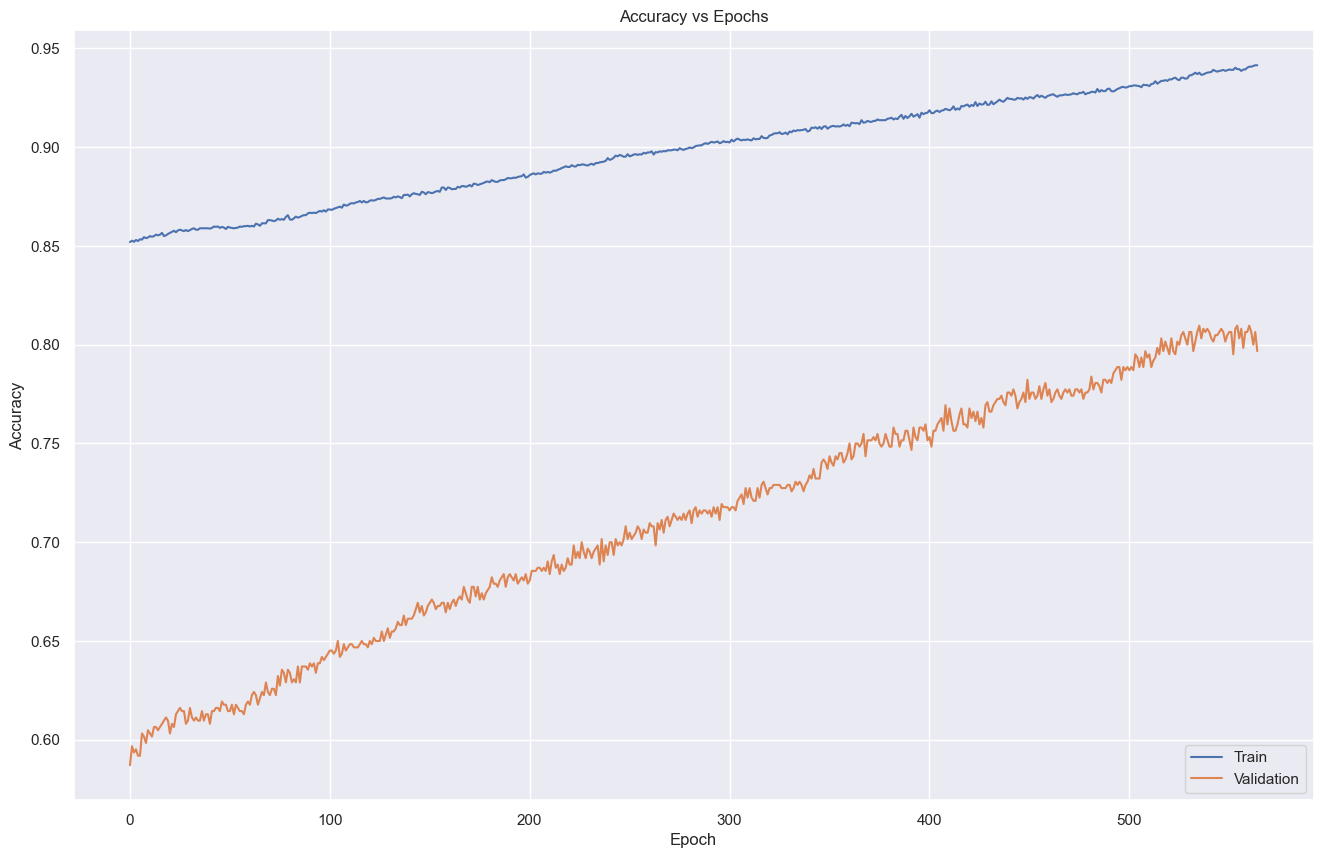

In [155]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

With SDG with balanced target (with SMOTE), it takes many more epoch for the validation accuracy to stablizes at 81% at 530 epoch.  This could mean, in this case, the oversampled data could be noisy or lack of patterns for the model to find the right pattern.  

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [134]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Epoch 1/165


/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 - 2s - 12ms/step - accuracy: 0.7360 - loss: 0.5313 - val_accuracy: 0.3226 - val_loss: 1.1397
Epoch 2/165
175/175 - 1s - 3ms/step - accuracy: 0.7662 - loss: 0.4905 - val_accuracy: 0.3661 - val_loss: 1.0967
Epoch 3/165
175/175 - 0s - 2ms/step - accuracy: 0.7759 - loss: 0.4718 - val_accuracy: 0.4016 - val_loss: 1.0282
Epoch 4/165
175/175 - 0s - 2ms/step - accuracy: 0.7895 - loss: 0.4537 - val_accuracy: 0.4371 - val_loss: 1.0107
Epoch 5/165
175/175 - 0s - 2ms/step - accuracy: 0.8030 - loss: 0.4373 - val_accuracy: 0.4968 - val_loss: 0.9332
Epoch 6/165
175/175 - 0s - 2ms/step - accuracy: 0.8120 - loss: 0.4231 - val_accuracy: 0.5226 - val_loss: 0.8927
Epoch 7/165
175/175 - 0s - 3ms/step - accuracy: 0.8182 - loss: 0.4125 - val_accuracy: 0.5387 - val_loss: 0.8526
Epoch 8/165
175/175 - 0s - 2ms/step - accuracy: 0.8218 - loss: 0.4042 - val_accuracy: 0.5597 - val_loss: 0.8215
Epoch 9/165
175/175 - 0s - 2ms/step - accuracy: 0.8243 - loss: 0.3964 - val_accuracy: 0.5790 - val_loss: 0.7928
Epo

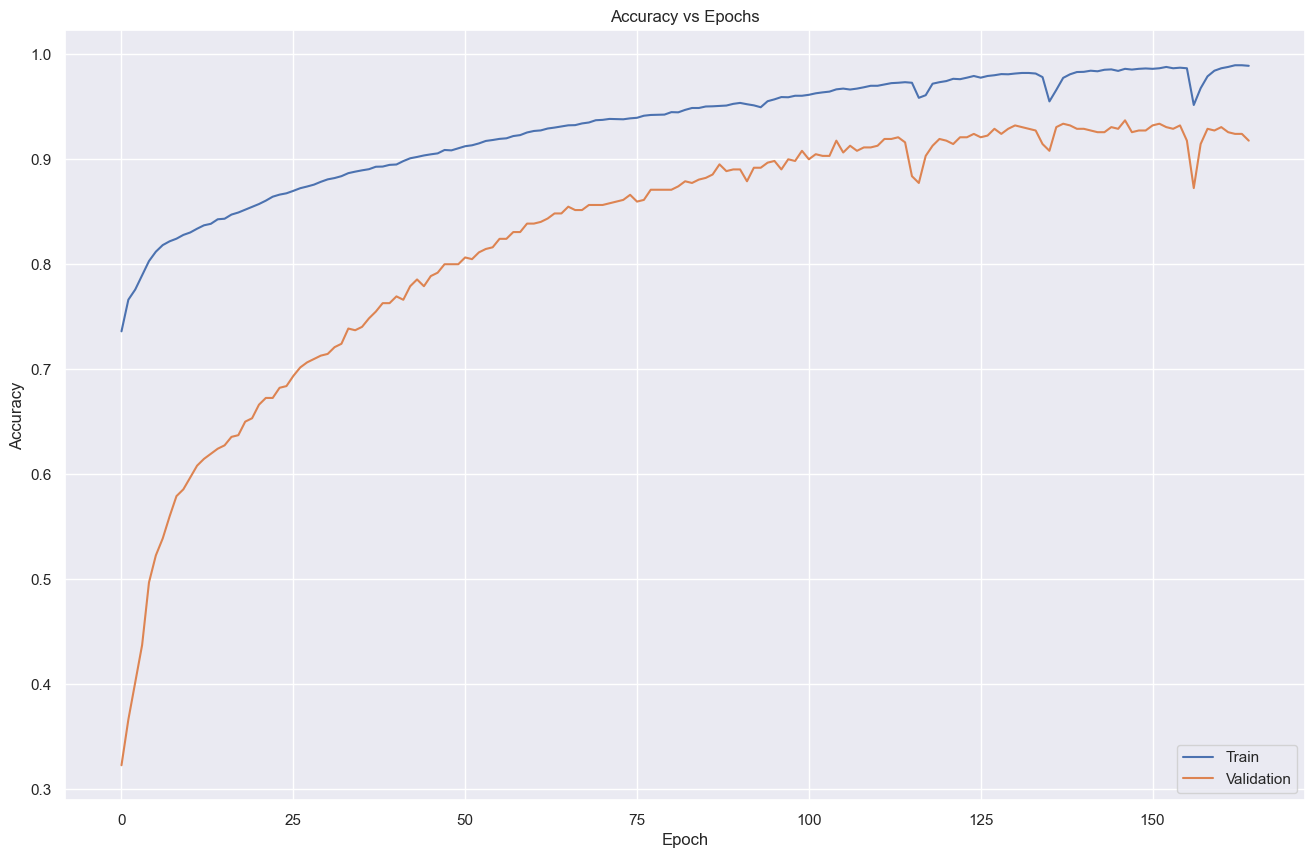

In [136]:
model_5 = Sequential()

model_5.add(Dense(128, activation='relu', input_shape=(15,)))

model_5.add(Dense(128, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_5 = model_5.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.1, 
                    epochs=165, 
                    verbose=2)
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Epoch 1/265
175/175 - 2s - 13ms/step - accuracy: 0.7341 - loss: 0.5414 - val_accuracy: 0.4306 - val_loss: 0.9422
Epoch 2/265
175/175 - 0s - 3ms/step - accuracy: 0.7585 - loss: 0.5065 - val_accuracy: 0.4581 - val_loss: 0.9026
Epoch 3/265
175/175 - 1s - 3ms/step - accuracy: 0.7646 - loss: 0.4891 - val_accuracy: 0.4903 - val_loss: 0.8653
Epoch 4/265
175/175 - 0s - 2ms/step - accuracy: 0.7757 - loss: 0.4768 - val_accuracy: 0.5081 - val_loss: 0.8736
Epoch 5/265
175/175 - 0s - 3ms/step - accuracy: 0.7843 - loss: 0.4621 - val_accuracy: 0.5194 - val_loss: 0.8679
Epoch 6/265
175/175 - 0s - 2ms/step - accuracy: 0.7947 - loss: 0.4523 - val_accuracy: 0.5677 - val_loss: 0.7974
Epoch 7/265
175/175 - 0s - 2ms/step - accuracy: 0.7976 - loss: 0.4382 - val_accuracy: 0.5774 - val_loss: 0.7716
Epoch 8/265
175/175 - 0s - 2ms/step - accuracy: 0.8087 - loss: 0.4239 - val_accuracy: 0.5919 - val_loss: 0.7423
Epoch 9/265
175/175 - 0s - 2ms/step - accuracy: 0.8184 - loss: 0.4128 - val_accuracy: 0.6113 - val_loss

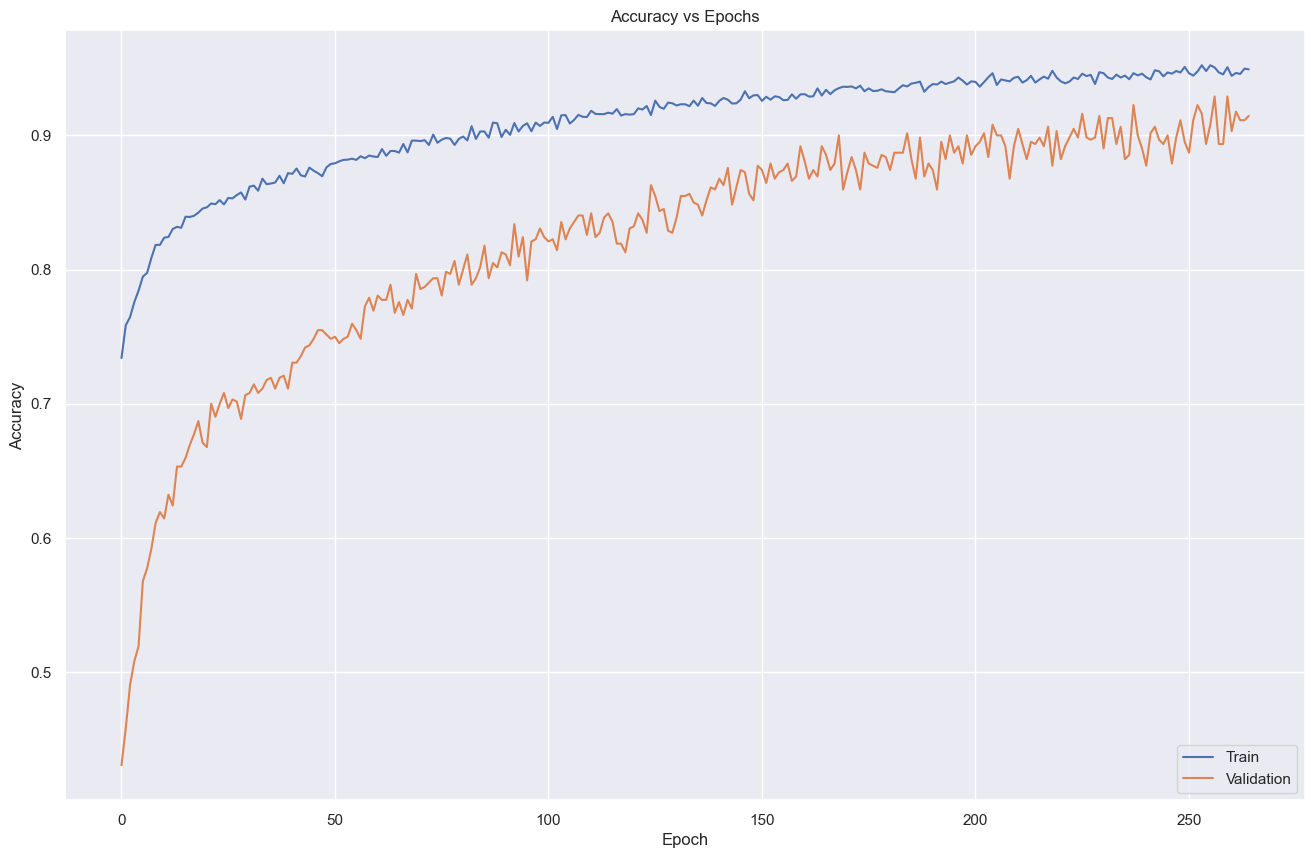

In [157]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)
model_6 = Sequential()

model_6.add(Dense(128, activation='relu', input_shape=(15,)))
model_6.add(Dropout(0.1))

model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(0.1))

model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6 = model_6.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.1, 
                    epochs=265, 
                    verbose=2)

plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


This model performs better and more consistent in relationship to training performance.  It is the best model.

## Let's add additonal training using Batch Optimization on the last model


Epoch 1/265


/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 - 3s - 19ms/step - accuracy: 0.7045 - loss: 0.5946 - val_accuracy: 0.3145 - val_loss: 0.8606
Epoch 2/265
175/175 - 0s - 3ms/step - accuracy: 0.7619 - loss: 0.5135 - val_accuracy: 0.5032 - val_loss: 0.7818
Epoch 3/265
175/175 - 1s - 3ms/step - accuracy: 0.7725 - loss: 0.4789 - val_accuracy: 0.6081 - val_loss: 0.7393
Epoch 4/265
175/175 - 1s - 3ms/step - accuracy: 0.7940 - loss: 0.4594 - val_accuracy: 0.5903 - val_loss: 0.7685
Epoch 5/265
175/175 - 0s - 3ms/step - accuracy: 0.8037 - loss: 0.4399 - val_accuracy: 0.6532 - val_loss: 0.6634
Epoch 6/265
175/175 - 1s - 3ms/step - accuracy: 0.8057 - loss: 0.4290 - val_accuracy: 0.6274 - val_loss: 0.7050
Epoch 7/265
175/175 - 1s - 3ms/step - accuracy: 0.8073 - loss: 0.4206 - val_accuracy: 0.6177 - val_loss: 0.6986
Epoch 8/265
175/175 - 1s - 3ms/step - accuracy: 0.8233 - loss: 0.4057 - val_accuracy: 0.6871 - val_loss: 0.5956
Epoch 9/265
175/175 - 1s - 3ms/step - accuracy: 0.8259 - loss: 0.3952 - val_accuracy: 0.6742 - val_loss: 0.6381
Epo

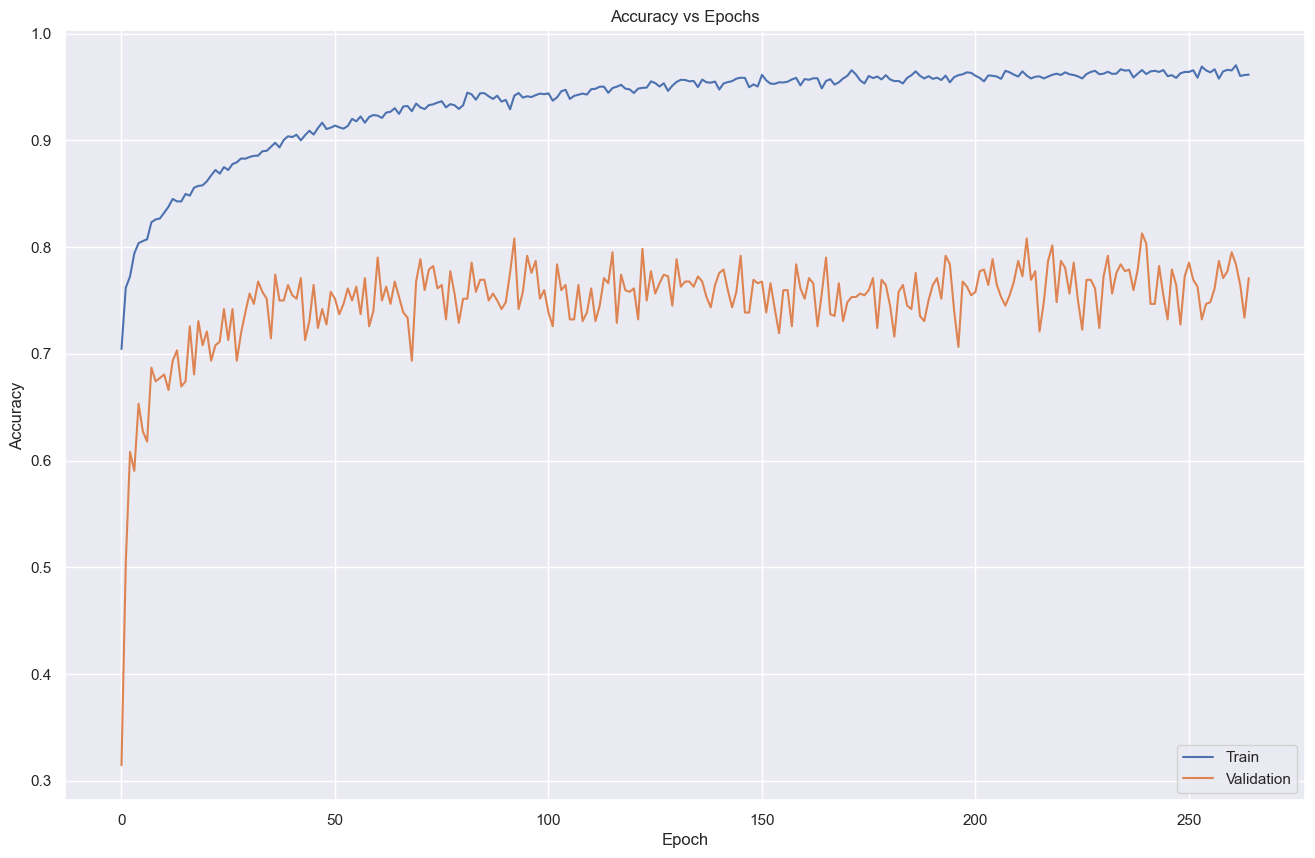

In [158]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
from tensorflow.keras.layers import BatchNormalization

import random
random.seed(42)

tf.random.set_seed(42)
model_7 = Sequential()

model_7.add(Dense(128, activation='relu', input_shape=(15,)))
model_7.add(Dropout(0.1))
model_7.add(BatchNormalization())

model_7.add(Dense(128, activation='relu'))
model_7.add(Dropout(0.1))
model_7.add(BatchNormalization())

model_7.add(Dense(1, activation='sigmoid'))

model_7.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_7 = model_7.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.1, 
                    epochs=265, 
                    verbose=2)

plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


Adding the batch optomization did't help hidden layers.  This could be cause there is no issue with gradient.  The resulting normalization actually smooth out to much feature from the data and force model to overfit more than without batch otpmization.

## Also tried with adjusted to tune different SMOTE imbalance parameers 

Epoch 1/265


/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 - 4s - 17ms/step - accuracy: 0.6852 - loss: 0.6077 - val_accuracy: 0.8039 - val_loss: 0.5234
Epoch 2/265
218/218 - 1s - 3ms/step - accuracy: 0.7323 - loss: 0.5307 - val_accuracy: 0.7381 - val_loss: 0.5251
Epoch 3/265
218/218 - 1s - 3ms/step - accuracy: 0.7533 - loss: 0.4979 - val_accuracy: 0.7561 - val_loss: 0.4870
Epoch 4/265
218/218 - 1s - 3ms/step - accuracy: 0.7725 - loss: 0.4750 - val_accuracy: 0.7897 - val_loss: 0.4744
Epoch 5/265
218/218 - 1s - 3ms/step - accuracy: 0.7871 - loss: 0.4554 - val_accuracy: 0.8129 - val_loss: 0.4424
Epoch 6/265
218/218 - 1s - 3ms/step - accuracy: 0.7937 - loss: 0.4415 - val_accuracy: 0.8155 - val_loss: 0.4189
Epoch 7/265
218/218 - 1s - 3ms/step - accuracy: 0.8032 - loss: 0.4264 - val_accuracy: 0.8245 - val_loss: 0.4066
Epoch 8/265
218/218 - 1s - 3ms/step - accuracy: 0.8113 - loss: 0.4110 - val_accuracy: 0.8232 - val_loss: 0.4286
Epoch 9/265
218/218 - 1s - 3ms/step - accuracy: 0.8180 - loss: 0.4041 - val_accuracy: 0.8219 - val_loss: 0.3995
Epo

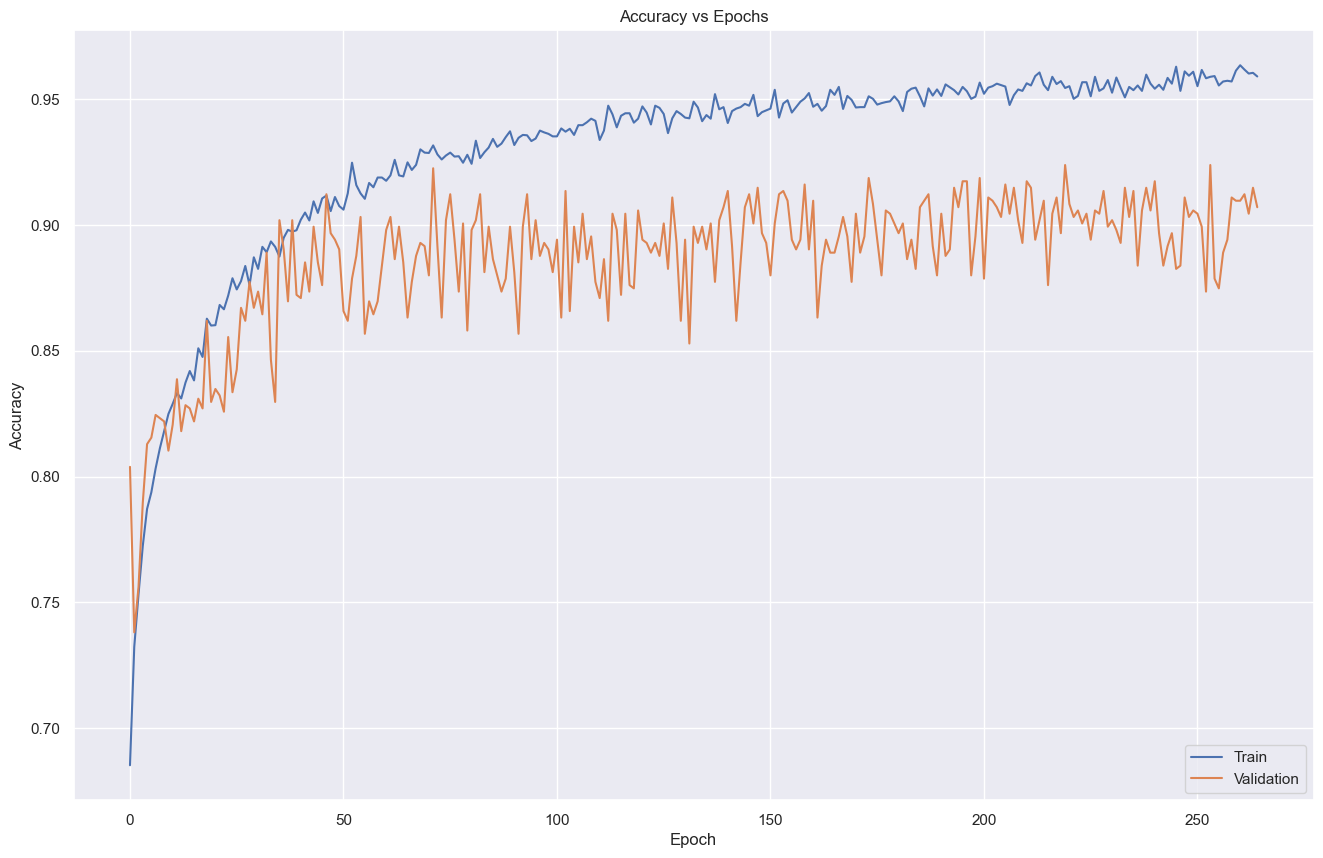

In [ ]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=1) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
from tensorflow.keras.layers import BatchNormalization

import random
random.seed(42)

tf.random.set_seed(42)
model_8 = Sequential()

model_8.add(Dense(128, activation='relu', input_shape=(15,)))
model_8.add(Dropout(0.1))
model_8.add(BatchNormalization())

model_8.add(Dense(128, activation='relu'))
model_8.add(Dropout(0.1))
model_8.add(BatchNormalization())

model_8.add(Dense(1, activation='sigmoid'))

model_8.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_8 = model_8.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.1, 
                    epochs=265, 
                    verbose=2)

plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Using equal classes and sampling tighter around the minority within class, the model seems to perform with larger variations in terms of accuracy.  The final result didn't seems to be better by tuning with different SMOTE parameters.  

Epoch 1/50


/Users/xtremedev/.pyenv/versions/dtree/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


318/318 - 3s - 11ms/step - accuracy: 0.6252 - loss: 0.9362 - val_accuracy: 0.9331 - val_loss: 0.6539
Epoch 2/50
318/318 - 1s - 3ms/step - accuracy: 0.6610 - loss: 0.8379 - val_accuracy: 0.8419 - val_loss: 0.7682
Epoch 3/50
318/318 - 1s - 3ms/step - accuracy: 0.6844 - loss: 0.8075 - val_accuracy: 0.8368 - val_loss: 0.7624
Epoch 4/50
318/318 - 1s - 3ms/step - accuracy: 0.6930 - loss: 0.7798 - val_accuracy: 0.8431 - val_loss: 0.7575
Epoch 5/50
318/318 - 1s - 4ms/step - accuracy: 0.7030 - loss: 0.7539 - val_accuracy: 0.8510 - val_loss: 0.7357
Epoch 6/50
318/318 - 1s - 3ms/step - accuracy: 0.7139 - loss: 0.7450 - val_accuracy: 0.8596 - val_loss: 0.7211
Epoch 7/50
318/318 - 1s - 3ms/step - accuracy: 0.7179 - loss: 0.7321 - val_accuracy: 0.8561 - val_loss: 0.7080
Epoch 8/50
318/318 - 1s - 3ms/step - accuracy: 0.7294 - loss: 0.7098 - val_accuracy: 0.8647 - val_loss: 0.6760
Epoch 9/50
318/318 - 1s - 3ms/step - accuracy: 0.7358 - loss: 0.7011 - val_accuracy: 0.8671 - val_loss: 0.6667
Epoch 10/50

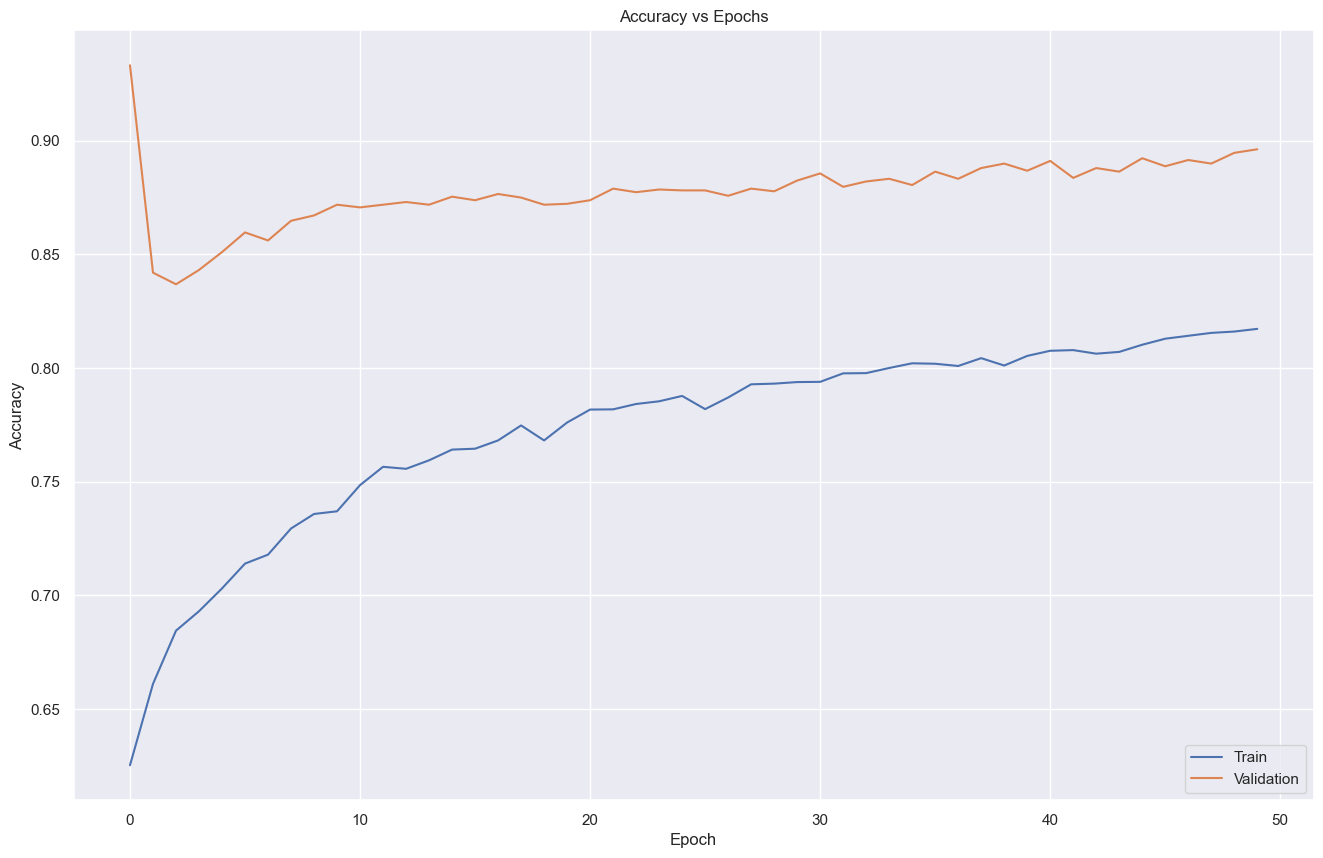

In [291]:
#turn all cataegorical variables into dummies using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras import backend as K

def weighted_binary_crossentropy(beta=2.0):
    def loss(y_true, y_pred):
        # Beta > 1 penalizes false negatives more than false positives
        weight_vector = y_true * beta + (1 - y_true)
        bce = K.binary_crossentropy(y_true, y_pred)
        weighted_bce = weight_vector * bce
        return K.mean(weighted_bce)
    return loss

data1 = df.copy()
data1.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


oneHotEncoder = OneHotEncoder()

# Define which columns to one-hot encode
columns_to_hotencode = ["Geography","Gender","HasCrCard","IsActiveMember"]
columns_to_hotencode_only = ["Surname"]

columens_to_standardize = ["Age"]

columns_to_Robust = ["CreditScore", "Balance", "EstimatedSalary"]

categorical_onehottransformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

categorical_onehottransformer_only = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])


categorical_standardizetransformer = Pipeline(steps=[
    ('standarize', StandardScaler()), 
])

categorical_robusttransformer = Pipeline(steps=[
    ('robus', RobustScaler()), 
])


# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('catonehot', categorical_onehottransformer, columns_to_hotencode),
        ('standardize', categorical_standardizetransformer, columens_to_standardize),
        ('robust', categorical_robusttransformer, columns_to_Robust)    

    ],
    remainder='passthrough'  # Include other columns without transformation
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(data1)

# Create a new DataFrame with transformed data
transformed_df = pd.DataFrame(transformed_data, 
                            columns = pipeline.get_feature_names_out())


features_df = transformed_df.drop(['remainder__Exited'], axis=1)

target_df = transformed_df['remainder__Exited']

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42)

sm = SMOTE(sampling_strategy=1, k_neighbors=2, random_state=1) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
from tensorflow.keras.layers import BatchNormalization

import random
random.seed(42)

tf.random.set_seed(42)
model_8 = Sequential()

model_8.add(Dense(128, activation='relu', input_shape=(15,)))
model_8.add(Dropout(0.1))
model_8.add(BatchNormalization())

model_8.add(Dense(168, activation='relu'))
model_8.add(Dropout(0.1))
model_8.add(BatchNormalization())

model_8.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')

#model_8.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_8.compile(loss = weighted_binary_crossentropy(beta=2.0), optimizer=optimizer, metrics=['accuracy'])

class_weights = {0: 1.0, 1: 5.0} 
history_8 = model_8.fit(X_train_over, 
                    y_train_over,
                    validation_split=0.2, 
                    epochs=50, 
                    verbose=2)

plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Model Performance Comparison and Final Model Selection

In [214]:
print('Model 1:')
model_1.evaluate(X_test, y_test, verbose = 1)
test_pred1 = np.round(model_3.predict(X_test))
print('Model 2:')
model_2.evaluate(X_test, y_test, verbose = 1)
test_pred2 = np.round(model_3.predict(X_test))
print('Model 3:')
model_3.evaluate(X_test, y_test, verbose = 1)
test_pred3 = np.round(model_3.predict(X_test))
print('Model 4:')
model_4.evaluate(X_test, y_test, verbose = 1)
test_pred4 = np.round(model_3.predict(X_test))
print('Model 5:')
model_5.evaluate(X_test, y_test, verbose = 1)
test_pred5 = np.round(model_3.predict(X_test))
print('Model 6:')
model_6.evaluate(X_test, y_test, verbose = 1)
test_pred6 = np.round(model_3.predict(X_test))

Model 1:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3560
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Model 2:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 1.0920
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 3:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.4918
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 4:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.4349
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 5:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8361 - loss: 1.0113
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 6:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.5037
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.6156
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.5037
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1607
         1.0       0.69      0.65      0.67       393

    accuracy                           0.87      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.87      0.87      0.87      2000



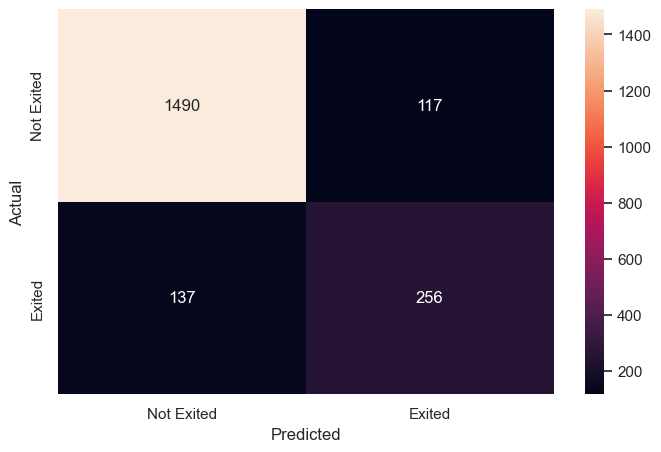

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.6518
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83      1607
         1.0       0.42      0.78      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



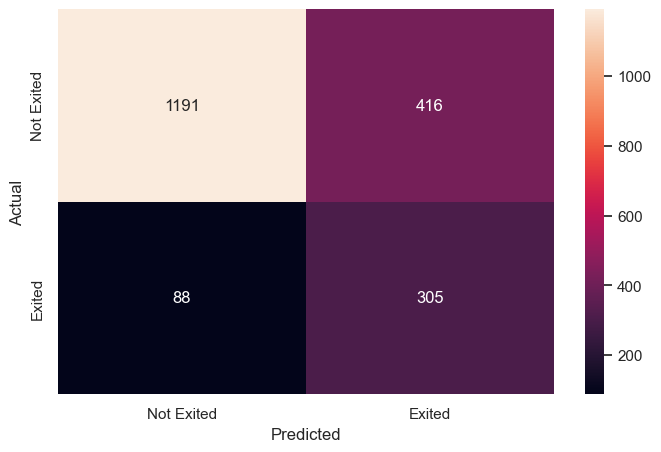

In [293]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_6.evaluate(X_test, y_test, verbose = 1)
test_pred6 = np.round(model_6.predict(X_test))
print(classification_report(y_test, test_pred6))
cm = confusion_matrix(y_test, test_pred6)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

model_8.evaluate(X_test, y_test, verbose = 1)
test_pred8 = np.round(model_8.predict(X_test))
print(classification_report(y_test, test_pred8))
cm = confusion_matrix(y_test, test_pred8)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In above example, model_8 performed better with slightly higher recall value with F1 value of 0.55.  Due to the class imbalance, I think this F1 value is okay.<br/>
For hyperparameters tuning, I tried the following:<br/>
<li>Added class weight bias for class 1, it didn't help because SMOTE is already applied
<li>I added more layers, it caused overfitting
<li>Finally, for model_8 above, I added more neuron to last layer, then added weighted cross-entropy loss function to penalize the false negatives, then added the learning rate values to slow down the learning, and also stopped the training early.  


In [292]:
import tensorflow as tf

def gradient_importance(model, X):
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        predictions = model(X_tensor)
    
    gradients = tape.gradient(predictions, X_tensor)
    importances = tf.reduce_mean(tf.abs(gradients), axis=0)
    
    return importances.numpy()

column_names = ", ".join([f"'{col}'" for col in X_test.columns])
print(column_names)
gradient_importance(model_8, X_test)


'catonehot__Geography_0.0', 'catonehot__Geography_1.0', 'catonehot__Geography_2.0', 'catonehot__Gender_0.0', 'catonehot__Gender_1.0', 'catonehot__HasCrCard_0.0', 'catonehot__HasCrCard_1.0', 'catonehot__IsActiveMember_0.0', 'catonehot__IsActiveMember_1.0', 'standardize__Age', 'robust__CreditScore', 'robust__Balance', 'robust__EstimatedSalary', 'remainder__Tenure', 'remainder__NumOfProducts'


array([0.12110842, 0.16125213, 0.11124583, 0.14321527, 0.11459278,
       0.10002074, 0.10918367, 0.13102438, 0.13225879, 0.200911  ,
       0.11088337, 0.17747171, 0.12209603, 0.05496881, 0.26077884],
      dtype=float32)

The above showed the importance of the different features based on gradient importance calculation.  It showed the Geography seems to have high predicatable value, followed by IsActiveMember and etc...

## Actionable Insights and Business Recommendations

<li> From the data, it looks like Age, NumberOfProduct and IsActiveMember are correlated.  
<li> Using gradient decent measure the feature importanced used to adjust the convergence, #1: Geography has significant importance, #2: IsActiveMmber, #3: Gender and HasCrCard, #4: Age, #5: Balance, #6: NumberOfProduct, #7: Salary.
<li> Since the # of customers who left is small compares to those thow have stayed, it maded the analysis harder.  The company should conduct more survey of the customer who left to obtain more insight.
<li> Based on the feature imporance, the company should look at the customer in France in terms of why it churned less vs Germany which seems to have higher churn rate.  In fact, it is reasonable due to cultural and region differences, the bank can consider creating separate model for each country.
<li> The model with using Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout with added more neuron to last layer, using weighted cross-entropy loss function to penalize the false negatives, reducing the learning rate values to slow down the learning, and stopping the training early performed the best.



<font size=6 color='blue'>Power Ahead</font>
___